<a href="https://colab.research.google.com/github/ankitrijal2054/CPSMA-441301/blob/main/Derivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Module 2: Derivatives



$Ankit Rijal$

$Min Sun Kim$

$Tylar Gifford$

$CPSMA - 441301$

$Dr. Nicolas Jacob$


In the previous project, the functions of the computing errors were defined along with Taylor series expantion  for $e^{x}$ centered at c=3. 

Now, I am going to list some functions for computing the forward difference, backward difference, central difference for the derivative.

In [ ]:
#forward difference for derivatives
def fwd_diff(function,initial,step):
  f_diff = (function(initial+step)-function(initial))/step
  return f_diff

#backward difference for derivatives
def back_diff(function,initial,step):
  b_diff = (function(initial)-function(initial-step))/step
  return b_diff

#central difference for derivatives
def central_diff(function,initial,step):
  c_diff = (function(initial+step)-function(initial-step))/(2*step)
  return c_diff

#finite difference for second order derivatives
def finite_diff(function,initial,step):
  fi_diff = (function(initial+2*step)-2*function(initial+step)+function(initial))/step**2
  return fi_diff

#absolute error
def abs_error(estimate, actual_value):
  a_error = actual_value - estimate
  return a_error

#relative error
def rel_error(estimate, actual_value):
  r_error = (actual_value - estimate)/actual_value
  return r_error

## Derivative Functions 

Following are the three derivative estimation functions that we will define:-

1) Forward difference:

2) Backward difference:

3) Central difference:

In addition,
 
I am going to write the definition for the finite difference of the second order derivative: 




I will now import the math package to compute the above.

In [ ]:
import math

stepSizes = [1, .1 , .01 , .001,.0001]
forward = []
backward = []
central = []
finite = []

#calculating all derivatives for each step sizes and adding it on the list
for step in stepSizes:
  forward.append(fwd_diff(math.exp, 3, step)) 
  backward.append(back_diff(math.exp, 3, step)) 
  central.append(central_diff(math.exp, 3, step))
  finite.append(finite_diff(math.exp, 3, step))

actual = math.exp(3)
actualSecond = math.exp(3)
abs_forward = []
rel_forward = []
abs_backward = []
rel_backward = []
abs_central = []
rel_central = []
abs_finite = []
rel_finite = []

#calculating errors for each derivatives and adding it on the list
for n in range(0,len(stepSizes)):
  abs_forward.append(abs_error(forward[n], actual)) 
  rel_forward.append(rel_error(forward[n], actual)) 

  abs_backward.append(abs_error(backward[n], actual)) 
  rel_backward.append(rel_error(backward[n], actual)) 

  abs_central.append(abs_error(central[n], actual)) 
  rel_central.append(rel_error(central[n], actual)) 

  abs_finite.append(abs_error(finite[n],actualSecond)) 
  rel_finite.append(rel_error(finite[n], actualSecond))

print(abs_forward)

[-14.4270761867689, -1.0386066593520127, -0.10076328213816765, -0.01004611688674828, -0.0010043103583612378]


By using package plotly, I am going to create a table that is useful while making visualizations.

In [ ]:
import plotly.graph_objects as go

from plotly.subplots import make_subplots

fig = make_subplots(
    
  rows = 2, cols = 1,
    
  shared_xaxes=True,

  shared_yaxes=True,
    
  vertical_spacing=.01,
    
  specs = [[{"type": "table"}],
           
          [{"type": "table"}]]

)

fig.add_trace(go.Table(
                
  header = dict(values=['Step Size', 'Forward Estimate', 'Absolute Error','Relative Error', '','Step Size', 'Backward Estimate', 'Absolute Error','Relative Error'],
                
    fill=dict(color=['lightskyblue', 'lightskyblue','lightskyblue','lightskyblue','white','lightskyblue','lightskyblue','lightskyblue','lightskyblue']),

    line_color = 'white',

    font_size = 13.5,
                
    align='left'),            
  
  cells = dict(values = [stepSizes,forward,abs_forward,rel_forward,'',stepSizes,backward,abs_backward,rel_backward],
               
    fill=dict(color=['paleturquoise','lightcyan','lightcyan','lightcyan','white','paleturquoise','lightcyan','lightcyan','lightcyan']),

    line_color = 'white',
               
    align = 'left')),
  
    row = 1, col = 1)     
                     
fig.add_trace(go.Table(
                
  header = dict(values=['Step Size', 'Central Estimate', 'Absolute Error','Relative Error', '','Step Size', 'Finite Estimate', 'Absolute Error','Relative Error'],
                
    fill = dict(color=['lightskyblue', 'lightskyblue','lightskyblue','lightskyblue','white','lightskyblue','lightskyblue','lightskyblue','lightskyblue']),

    line_color = 'white',

    font_size = 13.5,
                
    align = 'left'),
                 
  cells = dict(values = [stepSizes, central, abs_central, rel_central,'',stepSizes, finite, abs_finite, rel_finite],
               
    fill=dict(color=['paleturquoise','lightcyan','lightcyan','lightcyan','white','paleturquoise','lightcyan','lightcyan','lightcyan']),

    line_color = 'white',
               
    align = 'left')),
  
    row = 2, col = 1)

fig.update_layout(width=1850, height=500)

fig.show()

### Lagrange Interpolation

Here, I am going to define some functions that will be required for performing Lagrange Interpolation. 

The first function allows in computing the coefficients that apprears in Lagrange interpolating polynomials while the second function constructs the Lagrage Interpolator. 

In [ ]:
#function for lagrange interpolation
def lagrangeCoefficient(input,output,entry,x):
  lc = 1
  for i in range(len(input)):
    if i != entry:
      lc = lc*(x - input[i])/(input[entry]-input[i])
  return lc

def lagrangeInterpolator(input, output, x):
  li = 0
  for i in range(len(input)):
    li = li + lagrangeCoefficient(input,output,i,x)*output[i]
  return li

In [ ]:
#calculating true output for each input and adding it on the list
input = [3, 3+0.1, 3/2]
output = []
for x in input:
  output.append(math.exp(x))

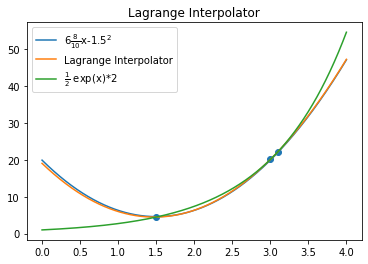

In [ ]:
from matplotlib import pyplot as plot
import numpy as npy

#creating a lagrange interpolation graph

x = npy.arange(0, 4, .001)

y = 6.8*((x-1.5)**2) + 4.6

fig, ax = plot.subplots()

ax.plot(x,y, label = r'6$\frac{8}{10}$x-$1.5^2$')

ax.plot(x, lagrangeInterpolator(input,output,x), label='Lagrange Interpolator')

ax.scatter(input, output)

ax.plot(x, .5*(npy.exp(x)*2), label=r'$\frac{1}{2}$ exp(x)*2')

ax.set_title('Lagrange Interpolator')

ax.legend()

In [ ]:
actual_value = math.exp(3+0.2)
interpolator_value = lagrangeInterpolator(input, output, 3+0.2)
second_actual_value = math.exp(3+0.2)
second_interpolator_value = 2*output[0]/((input[0]-input[1])*(input[0]-input[2]))+2*output[1]/((input[1]-input[0])*(input[1]-input[2]))+2*output[2]/((input[2]-input[0])*(input[2]-input[1]))

In [ ]:
abs_interpolator_error = abs_error(interpolator_value, actual_value)
rel__interpolator_error = rel_error(interpolator_value, actual_value)
abs_secondInterpolator_error = abs_error(second_interpolator_value, second_actual_value)
eal_secondInterpolator_error = rel_error(second_interpolator_value, second_actual_value)

In [ ]:
print(f"Absolute and relative error for the interpolation at (center + 0.2) are {abs_interpolator_error} and {rel__interpolator_error} respectively.")
print("\n")
print(f"Absolute and relative error for the second derivative of the interpolation at (center + 0.2) are {abs_secondInterpolator_error} and {eal_secondInterpolator_error} respectively")

Absolute and relative error for the interpolation at (center + 0.2) are 0.0881448280724193 and 0.0035929774615259757 respectively.


Absolute and relative error for the second derivative of the interpolation at (center + 0.2) are 11.130557262976087 and 0.45370604554631677 respectively
